<h1><center>Final Project - Phoenix Sky Harbor International Airport - <i> Part 1 </i></center></h1>

<h3><center><i>Guillaume Denis<i></center></h3>


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import nltk
import string
import nlp_utilities as nlp
from nltk.text import Text
from matplotlib import pyplot
import pymysql

ModuleNotFoundError: No module named 'pymysql'

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [6]:
server = "analyst-toolbelt.cn119w37trlg.eu-west-1.rds.amazonaws.com"
username = "emlyon1"
password = "student1"

In [7]:
connection = pymysql.connect(host=server,
                             user=username,
                             password=password,
                             db='yelp',
                             charset='utf8')

In [8]:
QUERY = """
select * from review
where business_id = 'hW0Ne_HTHEAgGF1rAdmR-g';
"""

In [9]:
myreviews = pd.read_sql(QUERY, connection)

In [10]:
myreviews.head()

,rid,business_id,user_id,stars,text,date,useful_votes,funny_votes,cool_votes
0,8,hW0Ne_HTHEAgGF1rAdmR-g,1ieuYcKS7zeAv_U15AB13A,4,"Luckily, I didn't have to travel far to make m...",2012-07-12,1,0,0
1,91,hW0Ne_HTHEAgGF1rAdmR-g,8tbXmjYGsYFZXk6ppuwRWQ,1,The beach paradise of Ixtapa-Zihuatenejo await...,2010-07-06,7,9,7
2,147,hW0Ne_HTHEAgGF1rAdmR-g,gYIHSsoa260H544x9guLOg,3,I have been through plenty of airports around ...,2010-09-09,2,3,2
3,541,hW0Ne_HTHEAgGF1rAdmR-g,2FiNCj5rM3nF0qgaWf86Gg,2,A pain to get in and out of. I dread each trip...,2009-07-04,2,2,2
4,1126,hW0Ne_HTHEAgGF1rAdmR-g,A99dyhEqcd_yXKPfBWeZHA,4,"My home airport, so with work travel, I'm pass...",2012-05-30,3,0,1


<h3><center>Analysis of the DataSet</center></h3>

<center>Length of the DataSet</center>

In [11]:
len(myreviews)

77

There are 77 reviews about the Phoenix Sky Harbor International Airport in this DataFrame

<center>Types of the columns</center>

In [12]:
myreviews.dtypes

rid              int64
business_id     object
user_id         object
stars            int64
text            object
date            object
useful_votes     int64
funny_votes      int64
cool_votes       int64
dtype: object

<center>Analysis of the Time Period</center>

In [13]:
SQL1 = "SELECT b.name, a.business_id, a.date, user_id, a.stars, useful_votes, funny_votes, cool_votes, text FROM review a INNER JOIN business b on a.business_id = b.business_id WHERE a.business_id = 'hW0Ne_HTHEAgGF1rAdmR-g' ORDER BY a.date ASC"

In [14]:
firstreview = pd.read_sql(SQL1, connection)

In [15]:
firstreview[:1]

,name,business_id,date,user_id,stars,useful_votes,funny_votes,cool_votes,text
0,Phoenix Sky Harbor International Airport,hW0Ne_HTHEAgGF1rAdmR-g,2007-02-11,OwcvQW8hbLjcU8eW-1xCIw,5,1,2,2,"Stuck here for 3hrs on a layover. What to do,..."


As we can see, the first review is from 2007-02-11.

In [16]:
SQL2 = "SELECT b.name, a.business_id, a.date, user_id, a.stars, useful_votes, funny_votes, cool_votes, text FROM review a INNER JOIN business b on a.business_id = b.business_id WHERE a.business_id = 'hW0Ne_HTHEAgGF1rAdmR-g' ORDER BY a.date DESC"

In [17]:
lastreview = pd.read_sql(SQL2, connection)

In [18]:
lastreview[:1]

,name,business_id,date,user_id,stars,useful_votes,funny_votes,cool_votes,text
0,Phoenix Sky Harbor International Airport,hW0Ne_HTHEAgGF1rAdmR-g,2012-12-30,igkkcYRh6VY5i15H6ocgfA,4,0,0,0,It's a pretty big airport! Beware if flying in...


As we can see, the last review is from 2012-12-30.

In [19]:
SQL3 = "SELECT a.stars, count(user_id) FROM review a INNER JOIN business b on a.business_id = b.business_id WHERE a.business_id = 'hW0Ne_HTHEAgGF1rAdmR-g' GROUP BY a.stars"

In [20]:
stars = pd.read_sql(SQL3, connection)

In [21]:
stars

,stars,count(user_id)
0,1,7
1,2,10
2,3,22
3,4,28
4,5,10


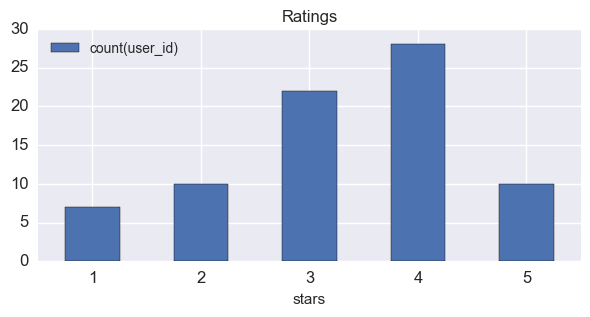

In [23]:
stars.plot.bar(x='stars', rot=0, title='Ratings', figsize=(7,3), fontsize=12)

<center> Let's check the time period of these ratings </center>

In [23]:
SQL4 = "SELECT a.date, user_id, a.stars, useful_votes, funny_votes, cool_votes, text FROM review a INNER JOIN business b on a.business_id = b.business_id WHERE a.business_id = 'hW0Ne_HTHEAgGF1rAdmR-g' AND a.stars = '5' ORDER BY 1 ASC"

In [24]:
five_stars = pd.read_sql(SQL4, connection)

In [25]:
len(five_stars)

10

In [26]:
five_stars[:1]

,date,user_id,stars,useful_votes,funny_votes,cool_votes,text
0,2007-02-11,OwcvQW8hbLjcU8eW-1xCIw,5,1,2,2,"Stuck here for 3hrs on a layover. What to do,..."


In [27]:
five_stars[9:10]

,date,user_id,stars,useful_votes,funny_votes,cool_votes,text
9,2012-06-14,Ac_4U3LDCrNgf6Z9OP3kXA,5,1,0,1,I like PHX airport.\n\nI find it easy to get t...


As we can see (and I checked for every other ratings), the time lapse is not very relevant

Let's look at the distribution of stars over time. There are no real trends, especially for the last 2 years of reviews. 

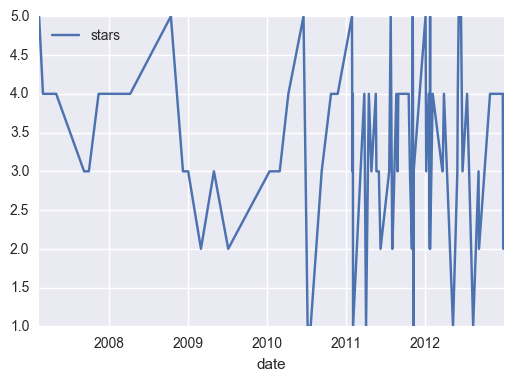

In [31]:
% matplotlib inline
myreviews.sort_values(by="date", ascending=True).plot(x="date", y="stars")

<center><b> Reviews per user </b></center>

In [28]:
SQL5 = "SELECT user_id, count(text) FROM review a INNER JOIN business b on a.business_id = b.business_id WHERE a.business_id = 'hW0Ne_HTHEAgGF1rAdmR-g' GROUP BY user_id"

In [29]:
review_per_user = pd.read_sql(SQL5, connection)

In [30]:
review_per_user

,user_id,count(text)
0,-24tMru5bOEJG7MeFwkdmw,1
1,-vRFUY8ixuNniCCNVvmkRQ,1
2,0EtZMnRQF2YsXvWBQ7FauQ,1
3,0mqHhdKEdak_A1FBhFNXqA,1
4,0q87nf1yJFv0GML2J64Ttg,1
5,1ieuYcKS7zeAv_U15AB13A,1
6,1IuiysbKKeaYtE2jRMgL6w,1
7,2FiNCj5rM3nF0qgaWf86Gg,1
8,2lFL7UtU5E_njKRU9DxiaA,1
9,2rlBbFPHyZjXSFSE8r551w,1


No user has posted twice

In [39]:
SQL6 = "SELECT b.name, a.business_id, a.date, user_id, a.stars, useful_votes, funny_votes, cool_votes, text FROM review a INNER JOIN business b on a.business_id = b.business_id WHERE a.business_id = 'hW0Ne_HTHEAgGF1rAdmR-g' AND funny_votes > '5' ORDER BY funny_votes DESC"

In [40]:
funny_votes = pd.read_sql(SQL6, connection)

In [41]:
funny_votes

,name,business_id,date,user_id,stars,useful_votes,funny_votes,cool_votes,text
0,Phoenix Sky Harbor International Airport,hW0Ne_HTHEAgGF1rAdmR-g,2011-01-29,J3rNWRLRuZJ_0xsJalIhlA,3,19,24,16,"In the age old debate of length v. girth, Sky ..."
1,Phoenix Sky Harbor International Airport,hW0Ne_HTHEAgGF1rAdmR-g,2010-07-06,8tbXmjYGsYFZXk6ppuwRWQ,1,7,9,7,The beach paradise of Ixtapa-Zihuatenejo await...
2,Phoenix Sky Harbor International Airport,hW0Ne_HTHEAgGF1rAdmR-g,2010-02-27,mFOZOsPQOacWIMVSyXbEbg,3,11,7,5,"""America's friendliest airport""? \n\nReally?\n..."
3,Phoenix Sky Harbor International Airport,hW0Ne_HTHEAgGF1rAdmR-g,2012-12-24,D6UanNuYWpQzZhLTDBmqJg,4,10,7,9,My girlfriend and I were sprinting from one si...
4,Phoenix Sky Harbor International Airport,hW0Ne_HTHEAgGF1rAdmR-g,2011-01-30,bM2OTIopnFoaQGLxK2PxPg,4,7,6,5,The following is a few reasons why I dig Sky H...


In [45]:
funniest = funny_votes[0:1]

In [46]:
funniest['text']

0    In the age old debate of length v. girth, Sky ...
Name: text, dtype: object

In [48]:
def write_review_files(path, reviewlist):
    """ Takes a directory path to write files into, and a list of review text."""
    if not path.endswith("/"):
        path = path + "/"
    try:
        for i, row in enumerate(reviewlist):
            filename = "review" + str(i) + ".txt"
            with open(path + filename, "w") as handle:
                handle.write(row)
    except:
        print("Something wrong with the path or file list. Does the directory exist?")
    print("Wrote %s files to %s." % (len(reviewlist), path))

In [49]:
write_review_files("data/funnyreview", funniest['text'])

Wrote 1 files to data/funnyreview/.


<u><b>Note</b></u>: This is also the file judged as the most useful review, it might be important to look at what is said